# Jupyter Notebook for the CNN - Data Analysis

ideas:\
-DONE INDIVIDUAL / COLLABORATION / UNKNOWN [if multiple authors convert to "collaboration" (analyze months with the most colaboration / colaboration throughout the year)]\
-check the most common words in the tile and create a statistic (possibly the most common noun/name)\
-DONE count the number of each date to determine the fluctioation daily published articles\
-DONE sort the index\
-pie chart for authors throughout the time\
-progression of single author/collaborations/unknown as 3 curves in one plot\
-DONE combine xmls for all months in a loop\
-DONE possibly perform regression for the final month\
...\
-DONE on what day of the week were the articles published\
-make the charts interactive\
\
-PROBLEMS:\
-inconsistent formatting

Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight") # seaborn OR seaborn-darkgrid OR ggplot (fun: fivethirtyeight) (without grid: seaborn-dark)
from sklearn import linear_model

Reading each month of the year and concatenating them into a single pandas dataframe

In [2]:
df_months = []
for i in range(1,12): # !!!AFTER THE YEAR IS OVER, EXTEND TO: 1-13 (TO INCLUDE DECEMBER)!!!
    df_months.append(pd.read_xml(f"xml_db/CNN_2021_{i}.xml"))
df_orig = pd.concat(df_months)
df_orig.shape

(3107, 6)

In [3]:
df_orig.head(3)

,date,title,url,author,textshort,textfull
0,2021-01-31,Ukraine Fast Facts,https://edition.cnn.com/2014/02/28/world/europ...,CNN Editorial Research,"Here's a look at Ukraine, the second-largest E...","Here's a look at Ukraine, the second-largest E..."
1,2021-01-30,Austrian man leaves fortune to French village ...,https://edition.cnn.com/2021/01/30/europe/fort...,"Eoin McSweeney and Arnaud Siad, CNN",An Austrian man who died in December has left ...,An Austrian man who died in December has left ...
2,2021-01-31,Manchester United star Marcus Rashford raciall...,https://edition.cnn.com/2021/01/31/football/ma...,"Ben Church, CNN",Manchester United forward Marcus Rashford has ...,Manchester United forward Marcus Rashford has ...


Re-shaping the dataframe 

In [4]:
# Removing everything but the meta-information
df = df_orig.loc[:, ["date", "title", "url", "author"]].copy()

# Sorting the dataframe by date (ascending)
df = df.sort_values("date", ascending=True).reset_index(drop=True)
df.head()


,date,title,url,author
0,2021-01-01,Australia has changed its national anthem in a...,https://edition.cnn.com/2021/01/01/australia/a...,"Jessie Yeung, CNN"
1,2021-01-01,2020 was a terrible year for Europe. 2021 is u...,https://edition.cnn.com/2020/12/31/europe/eu-b...,"Luke McGee, CNN"
2,2021-01-01,Leeds United owner Andrea Radrizzani defends c...,https://edition.cnn.com/2020/12/30/football/ka...,"Ben Church, CNN"
3,2021-01-01,Manchester United draw level with Liverpool as...,https://edition.cnn.com/2021/01/01/football/pr...,"Paul Gittings, CNN"
4,2021-01-02,Mauricio Pochettino takes charge at French pow...,https://edition.cnn.com/2021/01/02/football/pa...,"Paul Gittings, CNN"


Processing the re-shaped dataframe

In [5]:
# import pandas_profiling as pp
# possibly work with this later

# Publications by Date

In [6]:
publications = df.date.value_counts().sort_index().copy()
publications.head()

2021-01-01     4
2021-01-02     5
2021-01-03     7
2021-01-04     5
2021-01-05    10
Name: date, dtype: int64

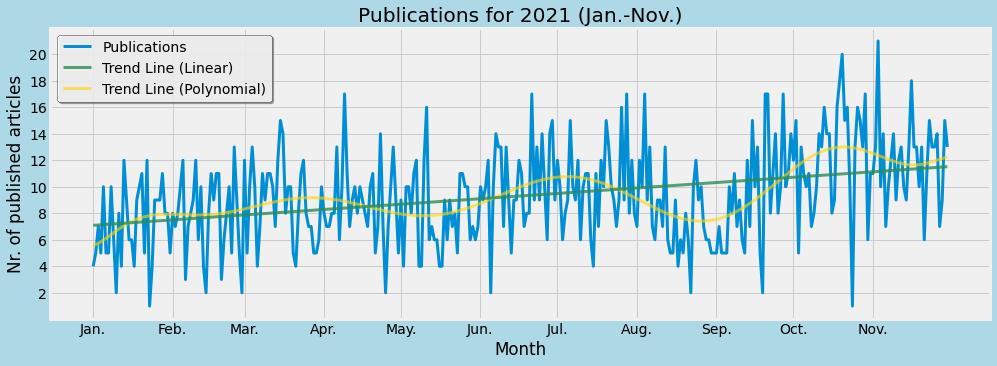

In [230]:
#Ideas:
#possibly switch from making individual series to pulling from a dataframe (this is likely more elegant)

# List of months
m = ["Jan.", "Feb.", "Mar.", "Apr.", "May.", "Jun.", "Jul.", "Aug.", "Sep.", "Oct.", "Nov."] # ADD MONTH OF DEC.
d = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]

# Initiating the plot 
fig_pub_year, ax_pub_year = plt.subplots()

# Feeding the data
publications.plot(x=publications.index, y=publications.values, title=f"Publications for 2021 ({m[0]}-{m[-1]})", kind="line", figsize=(15,5),
                    alpha=1, linewidth=3, label="Publications")

# Generating the trend line as polynomial regression
z = np.polyfit([i[0] for i in enumerate(publications.values)], publications.values, 11) # CHANGE DEGREE TO 12 (one for each month)
p = np.poly1d(z)
ax_pub_year.plot([i[0] for i in enumerate(publications.values)], p([i[0] for i in enumerate(publications.values)]),
                linewidth=3, c="gold", alpha=0.6, label="Trend Line (Polynomial)")

# Generating the trend line as linear regression
reg = linear_model.LinearRegression()
X = np.arange(0, len(publications.index))[:, np.newaxis]
y = publications.values[:, np.newaxis]
reg.fit(X, y)
y_pred = reg.predict(X)
ax_pub_year.plot(X, y_pred, linewidth=3, c="seagreen", alpha=0.8, label="Trend Line (Linear)")

# Predicting publications for December
#X_dec = np.arange(len(X)-1, 365-1)[:, np.newaxis]
#y_dec = reg.predict(X_dec)
#ax_pub_year.plot(X_dec, y_dec, linewidth=3, c="yellow", alpha=0.8)

# Configurating the chart
fig_pub_year.set_facecolor('lightblue') # outer
#ax_pub_year.set_facecolor('lightgrey') # inner
ax_pub_year.set_xticks(np.arange(0,len(publications), step=len(publications)/11)) #CHANGE THIS TO 12 AFTER ADDING DEC
ax_pub_year.set_xticks([np.sum(d[:i]) for i in range(len(d))])
ax_pub_year.set_xticklabels(m, rotation=0, ha="center")
ax_pub_year.set_yticks(np.arange(0,np.max(publications)+1, step=2)[1:])
ax_pub_year.set_xlabel("Month")
ax_pub_year.set_ylabel("Nr. of published articles")

handles, labels = ax_pub_year.get_legend_handles_labels() # handles, labels are extracted and then reordered to achieve a more pleasant look
ax_pub_year.legend(handles=handles[:1]+handles[-1:]+handles[1:2], labels=labels[:1]+labels[-1:]+labels[1:2], loc="upper left", title=None,
                    facecolor="white", edgecolor="black", fancybox=True, shadow=True, borderpad=None, framealpha=0.8)

# Drawing vertical separators for each month (if theme without a grid is used)
#dd = [np.sum(d[:i]) for i in range(len(d))]
#for xc in dd:
    #ax_pub_year.axvline(x=xc, c="red", linewidth=1)

In [8]:
start_reg_line = float(y_pred[0])
end_reg_line = float(y_pred[-1])

print(start_reg_line)
print(end_reg_line)
print((end_reg_line - start_reg_line)/start_reg_line*100)
print(np.round((end_reg_line - start_reg_line)/start_reg_line*100, 4))

7.090267226740549
11.514523192421128
62.39900167647764
62.399


# Publications by Weekday

In [9]:
weekdays_pub = df.date.value_counts().sort_index().copy()
weekdays_pub.head(3)

2021-01-01    4
2021-01-02    5
2021-01-03    7
Name: date, dtype: int64

In [10]:
# List of weekdays
week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Converting the list of weekdays to get: 1st of January, 2021 as Friday
start_day = lambda day : week[week.index(day):] + week[:week.index(day)] if week.index(day) else None
week = start_day("Friday")

# Generating a list of weekdays with the lenght of pandas.Series index
weekdays = []
i = 0
j = 0
while i < len(weekdays_pub.index):
    if j == len(week):
        j = 0
    weekdays.append(week[j])
    i += 1
    j += 1

weekdays_pub.index = weekdays
weekdays_pub = weekdays_pub.groupby(weekdays_pub.index).sum().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
weekdays_pub    

Monday       511
Tuesday      524
Wednesday    492
Thursday     460
Friday       494
Saturday     326
Sunday       300
Name: date, dtype: int64

Text(0, 0.5, 'Nr. of articles published')

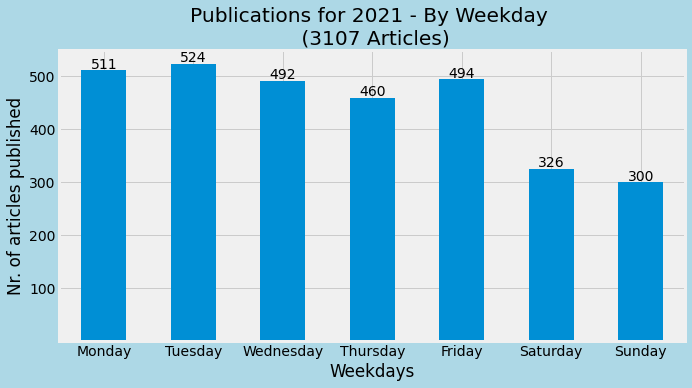

In [17]:
# Inititating the plot
fig_days, ax_days = plt.subplots()

# Feeding the data (pandas Series)
weekdays_pub.plot(kind="bar", title=f"Publications for 2021 - By Weekday \n ({np.sum(weekdays_pub.values)} Articles)", figsize=(10,5))

# Annotating individual bars
for bar in ax_days.patches:
    ax_days.annotate(bar.get_height(), (bar.get_x() + bar.get_width()/2, bar.get_height()),
    xytext=(0,6), textcoords="offset points", ha="center", va="center")

# Configuring the chart
fig_days.set_facecolor("lightblue")
ax_days.set_xticklabels(labels=weekdays_pub.index, rotation=0)
ax_days.set_yticks(np.arange(0,np.max(weekdays_pub)+1, step=100)[1:])
ax_days.set_xlabel("Weekdays")
ax_days.set_ylabel("Nr. of articles published")


Text(0.5, 0, 'Nr. of articles published')

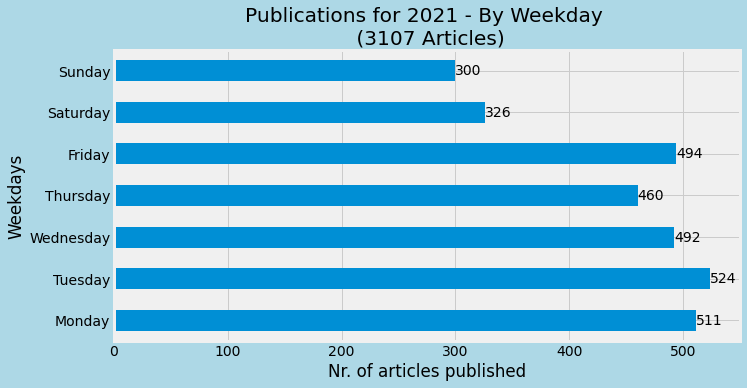

In [216]:
# Inititating the plot
fig_days, ax_days = plt.subplots()

# Feeding the data (pandas Series)
weekdays_pub.plot(kind="barh", title=f"Publications for 2021 - By Weekday \n ({np.sum(weekdays_pub.values)} Articles)", figsize=(10,5))

# Annotating individual bars
#for bar in ax_days.patches:
    #ax_days.annotate(bar.get_height(), (bar.get_x() + bar.get_width()/2, bar.get_height()),
    #xytext=(0,6), textcoords="offset points", ha="center", va="center")

for bar in ax_days.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, bar.get_width(), ha="left", va="center")

# Configuring the chart
fig_days.set_facecolor("lightblue")
#ax_days.set_xticklabels(labels=weekdays_pub.index, rotation=0)
#ax_days.set_xticks(np.arange(0,np.max(weekdays_pub)+1, step=100)[1:])
ax_days.set_ylabel("Weekdays")
ax_days.set_xlabel("Nr. of articles published")

# Publications by Author / Collaboration / Unknown 

In [59]:
authors = df.author.copy()
authors.head()

0     Jessie Yeung, CNN
1       Luke McGee, CNN
2       Ben Church, CNN
3    Paul Gittings, CNN
4    Paul Gittings, CNN
Name: author, dtype: object

In [60]:
# Storing the samples in the corresponding list to be insplected (if needed)
single = [] # single author
collab = [] # collaboration of multiple authors on the "contents" of the articel (excluding production of complementary photos, videos, etc.)
unknown = [] # no author names are provided

# Special cases (these are rare instances that are not covered by the implemented rules)
special_single = ["Jack Bantock. CNN", "John Sinnott CNN"]

for index, value in authors.items():
    s = value.split(',')
    if value in special_single:
        single.append(value)
        authors.iloc[index] = "Single author"
    elif " and " in value or "&" in value: # all cases with and (including collabs of "CNN & Reuters")
        collab.append(value)
        authors.iloc[index] = "Collaboration"
    elif len(s) == 1 and "cnn" in s[0].lower(): # cnn; cnn editorial research
        unknown.append(value)
        authors.iloc[index] = "Unknown"
    elif len(s) == 1 and " " in s[0]: # author (will also falsely include company names of multiple words BUT none have been observed so far)
        single.append(value)
        authors.iloc[index] = "Single author"
    elif len(s) == 2 and "cnn" in s[-1].lower(): # author, cnn
        single.append(value)
        authors.iloc[index] = "Single author"
    elif len(s) >= 2: # author, author (,author, etc.) OR author, author (,author, etc.), cnn
        collab.append(value)
        authors.iloc[index] = "Collaboration"
    else:
        unknown.append(value) # Reuters
        authors.iloc[index] = "Unknown"

print(f'Total count of processed elements: {np.sum([len(single), len(collab), len(unknown)])}')

authors = authors.value_counts()
authors


Total count of processed elements: 3107


Single author    1804
Collaboration     961
Unknown           342
Name: author, dtype: int64

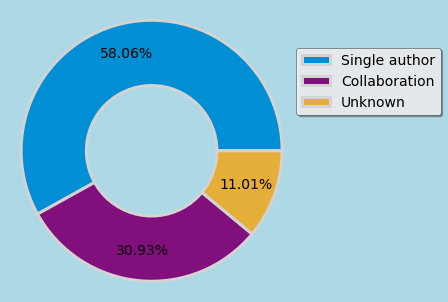

In [322]:
# Initiating the plot
fig_authors, ax_authors = plt.subplots()

# Feeding the data (pandas Series)
authors.plot(kind="pie", labels=None, radius=1, wedgeprops = {"linewidth": 3, "edgecolor" : "lightgrey"},
                            autopct="%.2f%%", pctdistance=0.77, shadow=False, startangle=0, figsize=(4,4), colors=["#008fd5", "#810f7c", "#e5ae38"])

# Creating adoughnut chart
circle = plt.Circle((0,0), 0.5, facecolor="lightblue", edgecolor="lightgrey", linewidth=3, fill=True)
p = plt.gcf()
p.gca().add_artist(circle)

# Configuring the chart
fig_authors.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=0)
ax_authors.axis("equal")
ax_authors.margins(0.05, 0.05)

fig_authors.set_facecolor("lightblue")
ax_authors.axis('off')
ax_authors.legend(labels=authors.index, loc="lower left", bbox_to_anchor=(0.98, 0.6, 0.5, 1.5), title=None,
                    facecolor="white", edgecolor="black", fancybox=True, shadow=True, borderpad=None, framealpha=0.8)

#ax_authors.set_title("Distribution of authors", loc="center", fontdict={"color":"black"})
# 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left',
# 'center right', 'lower center', 'upper center', 'center'

# possibly labels=np.round((authors.values / np.sum(authors.values) * 100), 2), labeldistance=0.5,

In [62]:
test_series = pd.Series(unknown)
#len(test_series.value_counts())
test = test_series.value_counts(normalize=True)
test

Reuters                   0.681287
CNN Editorial Research    0.181287
CNN                       0.096491
CNN Sports staff          0.017544
CNN staff                 0.008772
CNN Sport staff           0.008772
CNN Sport Staff           0.005848
dtype: float64

<AxesSubplot:>

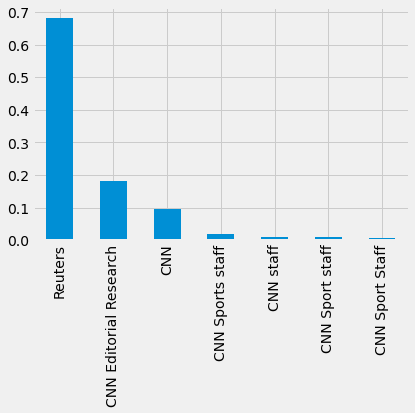

In [63]:
test.plot(kind="bar")

In [64]:
#print(("\n").join(unknown))

# Each month can also be analyzed individually

Converting one (one selected month) .xml files into a pandas dataframe

In [65]:
df_one_month = pd.read_xml("xml_db/CNN_2021_1.xml")
print(f'{df_one_month.shape=}')

df_one_month.shape=(219, 6)


# Publication plot for one month

In [66]:
publications_one_month = df_one_month.date.value_counts().sort_index().copy()
publications_one_month.head()

2021-01-01     4
2021-01-02     5
2021-01-03     7
2021-01-04     5
2021-01-05    10
Name: date, dtype: int64

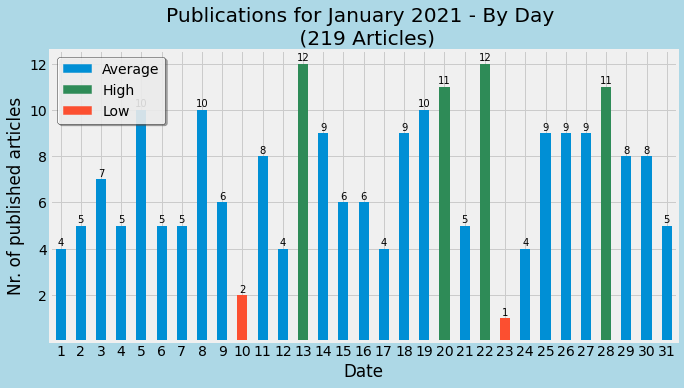

In [316]:
# Initiating the plot
fig_pub_month, ax_pub_month = plt.subplots()

# Feeding the data (pandas Series)
publications_one_month.plot(kind="bar", title=f"Publications for January 2021 - By Day \n ({np.sum(publications_one_month.values)} Articles)",
                            figsize=(10,5), alpha=1, linewidth=2, edgecolor=None, color=bar_c)

# Annotating individual bars
for bar in ax_pub_month.patches:
    ax_pub_month.annotate(bar.get_height(),(bar.get_x()+bar.get_width()/2, bar.get_height()),
    xytext=(0, 6), fontsize=10, textcoords="offset points", ha="center", va="center")

# Configuring the chart
fig_pub_month.set_facecolor("lightblue") # outer
#ax_pub.set_facecolor('lightgrey') # inner
ax_pub_month.set_xticks(np.arange(len(publications_one_month))) # custom ticks 1/2
ax_pub_month.set_xticklabels(np.arange(1, len(publications_one_month)+1), rotation=0) # custom ticks 2/2
ax_pub_month.set_yticks(np.arange(0,np.max(publications_one_month)+1, step=2)[1:])
ax_pub_month.set_xlabel("Date")
ax_pub_month.set_ylabel("Nr. of published articles")

import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color="#008fd5", label="Average")
green_patch = mpatches.Patch(color="seagreen", label="High")
red_patch = mpatches.Patch(color="#fc4f30", label="Low")
ax_pub_month.legend(handles=[blue_patch, green_patch, red_patch], handleheight=bar.get_width(), loc="upper left", title=None,
                    facecolor="white", edgecolor="black", fancybox=True, shadow=True, borderpad=None, framealpha=0.8, fontsize=14)

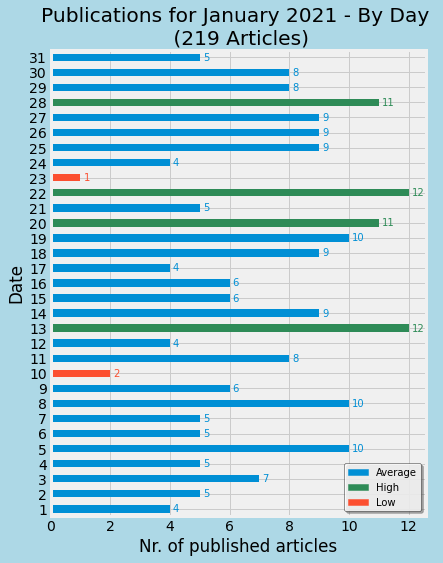

In [320]:
avg = np.sum(publications_one_month.values)//len(publications_one_month.values)
std = np.round(np.std(publications_one_month.values), 0)
bar_c = ["#fc4f30" if (d<avg-std) else "seagreen" if (d>avg+std) else "#008fd5" for d in publications_one_month.values]

# Initiating the plot
fig_pub_month, ax_pub_month = plt.subplots()

# Feeding the data (pandas Series)
publications_one_month.plot(kind="barh", title=f"Publications for January 2021 - By Day \n ({np.sum(publications_one_month.values)} Articles)",
                            figsize=(6,8), alpha=1, linewidth=2, edgecolor=None, color=bar_c)

# Annotating individual bars
for bar in ax_pub_month.patches:
    if bar.get_width() < avg-std:
        x = "#fc4f30"
    elif bar.get_width() > avg+std:
        x = "seagreen" # #6d904f
    else:
        x="#008fd5"
    plt.text(0.1 + bar.get_width(), bar.get_y() + bar.get_height()/2, bar.get_width(), ha="left", va="center", fontsize=10, color=x)

# Configuring the chart
fig_pub_month.set_facecolor("lightblue") # outer
#ax_pub.set_facecolor('lightgrey') # inner
ax_pub_month.set_yticks(np.arange(len(publications_one_month))) # custom ticks 1/2
ax_pub_month.set_yticklabels(np.arange(1, len(publications_one_month)+1), rotation=0) # custom ticks 2/2
ax_pub_month.set_xticks(np.arange(0,np.max(publications_one_month)+1, step=2)[:])
ax_pub_month.set_ylabel("Date")
ax_pub_month.set_xlabel("Nr. of published articles")

import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color="#008fd5", label="Average")
green_patch = mpatches.Patch(color="seagreen", label="High")
red_patch = mpatches.Patch(color="#fc4f30", label="Low")
ax_pub_month.legend(handles=[blue_patch, green_patch, red_patch], handleheight=bar.get_height(), loc="lower right", title=None,
                    facecolor="white", edgecolor="black", fancybox=True, shadow=True, borderpad=None, framealpha=0.8, fontsize=10)

In [86]:
np.sum(publications_one_month.values)//len(publications_one_month.values)

7

In [114]:
np.round(np.std(publications_one_month.values), 0)

3.0